WATER JUG PROBLEM


In [54]:
from collections import deque

def BFS(a, b, target):
    m = {}
    isSolvable = False
    path = []
    q = deque()
    q.append((0, 0))

    while (len(q) > 0):
        u = q.popleft()
        if ((u[0], u[1]) in m):
            continue
        if ((u[0] > a or u[1] > b or
            u[0] < 0 or u[1] < 0)):
            continue
        path.append([u[0], u[1]])
        m[(u[0], u[1])] = 1
        if (u[0] == target or u[1] == target):
            isSolvable = True
            if (u[0] == target):
                if (u[1] != 0):
                    path.append([u[0], 0])
            else:
                if (u[0] != 0):
                    path.append([0, u[1]])
            sz = len(path)
            for i in range(sz):
                print("(", path[i][0], ",",
                    path[i][1], ")")
            break
        q.append([u[0], b])
        q.append([a, u[1]])
        for ap in range(max(a, b) + 1):
            c = u[0] + ap
            d = u[1] - ap
            if (c == a or (d == 0 and d >= 0)):
                q.append([c, d])
            c = u[0] - ap
            d = u[1] + ap
            if ((c == 0 and c >= 0) or d == b):
                q.append([c, d])
        q.append([a, 0])
        q.append([0, b])
    if (not isSolvable):
        print("No solution")

if __name__ == '__main__':
    Jug1, Jug2, target = 4, 3, 2
    print("Path from initial state to solution state :")
    BFS(Jug2, Jug1, target)


Path from initial state to solution state :
( 0 , 0 )
( 0 , 4 )
( 3 , 0 )
( 3 , 4 )
( 3 , 1 )
( 0 , 3 )
( 3 , 3 )
( 2 , 4 )
( 2 , 0 )


S ALGO


In [55]:
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
data=pd.DataFrame({"Samples":[1,2,3,4,5],
                   "Fever":["Yes","No","Yes","No","Yes"],
                   "Cough":["Yes","Yes","Yes","No","Yes"],
                   "Difficulty Breathing":["No","No","Yes","No","Yes"],
                   "Diagnosed Disease":["Pneumonia","Common Cold","Pneumonia","Healthy",
                                        "Pneumonia"]})
data

,Samples,Fever,Cough,Difficulty Breathing,Diagnosed Disease
0,1,Yes,Yes,No,Pneumonia
1,2,No,Yes,No,Common Cold
2,3,Yes,Yes,Yes,Pneumonia
3,4,No,No,No,Healthy
4,5,Yes,Yes,Yes,Pneumonia


In [57]:
from matplotlib import pyplot as plt
data['Samples'].plot(kind='hist', bins=20, title='Samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
target="Pneumonia"
symptoms=["Fever","Cough","Difficulty Breathing"]
filter=data[data["Diagnosed Disease"]==target]
print(filter)

   Samples Fever Cough Difficulty Breathing Diagnosed Disease
0        1   Yes   Yes                   No         Pneumonia
2        3   Yes   Yes                  Yes         Pneumonia
4        5   Yes   Yes                  Yes         Pneumonia


In [59]:
total=filter.shape[0]
print(total)

3


In [60]:
pos = filter[(filter["Fever"] == "Yes") & (filter["Cough"] == "Yes") & (filter["Difficulty Breathing"] == "Yes")].shape[0]
print(pos)

2


In [61]:
print(f"Rule: If a patient has {', '.join(symptoms)}, then they are likely to have {target}")

Rule: If a patient has Fever, Cough, Difficulty Breathing, then they are likely to have Pneumonia


In [62]:
support = pos/total
print(f"Support : {support:.2f}")

Support : 0.67


In [63]:
confidence=pos/data[(data["Fever"] == "Yes") & (data["Cough"] == "Yes") & (data["Difficulty Breathing"] == "Yes")].shape[0]
print(f"Confidence : {confidence:.2f}")

Confidence : 1.00


candidate elimination

In [64]:
import numpy as np

class CandidateElimination:
    def __init__(self, num_features):
        # Initialize the most specific and most general hypotheses
        self.S = ['0'] * num_features
        self.G = ['?'] * num_features

    def specialize_G(self, example):
        # Specialize the most general hypothesis based on a positive example
        for i in range(len(self.G)):
            if self.G[i] == '?':
                self.G[i] = example[i]
            elif self.G[i] != example[i]:
                self.G[i] = '?'

    def generalize_S(self, example):
        # Generalize the most specific hypothesis based on a negative example
        for i in range(len(self.S)):
            if self.S[i] != example[i] and self.S[i] != '0':
                self.S[i] = '?'

    def fit(self, examples):
        for example in examples:
            label = example[-1]  # Last element is the label
            if label == 'Yes':
                self.specialize_G(example[:-1])  # Update G for positive example
            else:
                self.generalize_S(example[:-1])  # Update S for negative example

    def get_final_hypothesis(self):
        return self.S, self.G

# Example dataset
examples = [
    ['Big', 'Red', 'Circle', 'No'],
    ['Small', 'Red', 'Triangle', 'No'],
    ['Small', 'Red', 'Circle', 'Yes'],
    ['Big', 'Blue', 'Circle', 'No']
]

# Initialize CandidateElimination object
ce = CandidateElimination(num_features=len(examples[0]) - 1)  # -1 for excluding label

# Fit the data
ce.fit(examples)

# Get the final hypothesis
final_specific_hypothesis, final_general_hypothesis = ce.get_final_hypothesis()

print("Final Specific Hypothesis:", final_specific_hypothesis)
print("Final General Hypothesis:", final_general_hypothesis)


Final Specific Hypothesis: ['0', '0', '0']
Final General Hypothesis: ['Small', 'Red', 'Circle']


In [65]:
data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle','Yes')
]
def get_domains(data):
    d = [set() for i in data[0]]
    for x in data:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]
get_domains(data)
def g_0(n):
    return ('?',)*n

def s_0(n):
    return ('Phi',)*n
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != 'Phi' and (x == y or y == 'Phi'))
        more_general_parts.append(mg)
    return all(more_general_parts)

def consistent(hypothesis,example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not consistent(h[i:i+1],x[i:i+1]):
            if h[i] != 'Phi':
                h_new[i] = '?'
            else:
                h_new[i] = x[i]
    return [tuple(h_new)]

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not consistent(s,x):
            S.remove(s)
            Splus = min_generalizations(s, x)
            S.update([h for h in Splus if any([more_general(g,h)
                                               for g in G])])

            S.difference_update([h for h in S if
                                 any([more_general(h, h1)
                                      for h1 in S if h != h1])])
    return S

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == '?':
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != 'Phi':
            h_new = h[:i] + ('Phi',) + h[i+1:]
            results.append(h_new)
    return results

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if consistent(g,x):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            G.difference_update([h for h in G if
                                 any([more_general(g1, h)
                                      for g1 in G if h != g1])])
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]

    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i),G)
    print('\n S[{0}]:'.format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        if cx=='Yes':
            G = {g for g in G if consistent(g,x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s,x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i),G)
        print('\n S[{0}]:'.format(i),S)
    return
candidate_elimination(data)


All the hypotheses in General and Specific boundary are:


 G[0]: {('?', '?', '?')}

 S[0]: {('Phi', 'Phi', 'Phi')}

 G[1]: {('Small', '?', '?'), ('?', 'Blue', '?'), ('?', '?', 'Triangle')}

 S[1]: {('Phi', 'Phi', 'Phi')}

 G[2]: {('?', 'Blue', '?'), ('Small', '?', 'Circle'), ('Big', '?', 'Triangle')}

 S[2]: {('Phi', 'Phi', 'Phi')}

 G[3]: {('Small', '?', 'Circle')}

 S[3]: {('Small', 'Red', 'Circle')}

 G[4]: {('Small', '?', 'Circle')}

 S[4]: {('Small', 'Red', 'Circle')}

 G[5]: {('Small', '?', 'Circle')}

 S[5]: {('Small', '?', 'Circle')}


In [66]:
def get_domains(data):
    return [sorted(set(x)) for x in zip(*data)]

def g_0(n):
    return ('?',) * n

def s_0(n):
    return ('Phi',) * n

def more_general(h1, h2):
    return all(x == '?' or x != 'Phi' and (x == y or y == 'Phi') for x, y in zip(h1, h2))

def consistent(hypothesis, example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    return [(x_val if h_val == 'Phi' else '?') if not consistent([h_val], [x_val]) else h_val for h_val, x_val in zip(h, x)]

def generalize_S(x, G, S):
    for s in list(S):
        if not consistent(s, x):
            S.remove(s)
            S.update(h for h in [min_generalizations(s, x)] if any(more_general(g, h) for g in G))
            S.difference_update(h for h in S if any(more_general(h, h1) for h1 in S if h != h1))
    return S

def min_specializations(h, domains, x):
    return [h[:i] + (val,) + h[i + 1:] for i, val in enumerate(domains) if h[i] == '?' and x[i] != val] + \
           [('Phi',) * i + (val,) + ('Phi',) * (len(h) - i - 1) for i, val in enumerate(h) if val != 'Phi']

def specialize_G(x, domains, G, S):
    for g in list(G):
        if consistent(g, x):
            G.remove(g)
            G.update(h for h in min_specializations(g, domains, x) if any(more_general(h, s) for s in S))
            G.difference_update(h for h in G if any(more_general(g1, h) for g1 in G if h != g1))
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    G = {g_0(len(domains))}
    S = {s_0(len(domains))}
    i = 0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i), G)
    print('\n S[{0}]:'.format(i), S)
    for xcx in examples:
        i += 1
        x, cx = xcx[:-1], xcx[-1]
        if cx == 'Yes':
            G = {g for g in G if consistent(g, x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s, x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i), G)
        print('\n S[{0}]:'.format(i), S)
    return

data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle', 'Yes')
]

candidate_elimination(data)


All the hypotheses in General and Specific boundary are:


 G[0]: {('?', '?', '?')}

 S[0]: {('Phi', 'Phi', 'Phi')}


TypeError: unhashable type: 'list'

ID3


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NNML/house_purchase.xlsx')

# Check the columns of the DataFrame
print(df.columns)

# Define the entropy function
def entropy(s):
    p = [(s == c).mean() for c in set(s)]
    return sum([-pi * np.log2(pi) for pi in p if pi != 0])


# Define the information gain function
def info_gain(data, attribute, target):
    totalE = entropy(data[target])
    vals, counts = np.unique(data[attribute], return_counts=True)
    wt = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[attribute] == val).dropna()[target]) for i, val in enumerate(vals)])
    return totalE - wt

# Define the ID3 algorithm
def id3(data, og, features, target, parent_node_class=None):
    if len(np.unique(data[target])) <= 1:
        return np.unique(data[target])[0]
    elif len(data) == 0:
        return np.unique(og[target])[np.argmax(np.unique(og[target], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target])[np.argmax(np.unique(data[target], return_counts=True)[1])]
    item = [info_gain(data, feature, target) for feature in features]
    bestI = np.argmax(item)
    bestF = features[bestI]
    tree = {bestF: {}}
    features = [i for i in features if i != bestF]
    for value in np.unique(data[bestF]):
        value = value
        sub = data.where(data[bestF] == value).dropna()
        subtree = id3(sub, df, features, target, parent_node_class)
        tree[bestF][value] = subtree
    return tree

# Define the predict function
def predict(query, tree):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return "Cannot make a prediction"
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

# Define the query dictionary
query = {'Age': 30, 'Income': 50000, 'Gender': 'Male', 'MaritalStatus': 'Single'}

# Define features and target
features = ['Age', 'Income', 'Gender', 'MaritalStatus']
target = 'Buy'

# Build the decision tree
tree = id3(df, df, features, target)

# Predict the class label
prediction = predict(query, tree)
print("Predicted class label:", prediction)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Age', 'Income', 'Gender', 'MaritalStatus', 'Buy'], dtype='object')
Predicted class label: N


In [ ]:
import pandas as pd

# Creating a more varied dataset
data = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No']
})

# Step 1: Initialize h to the most specific hypothesis in H
hypothesis = pd.Series(['ϕ'] * (len(data.columns) - 1), index=data.columns[:-1])

# Display the initial hypothesis
print("Step 1: Initial Hypothesis")
print(hypothesis, "\n")

# Step 2: Iterate through positive examples
for index, row in data.iterrows():
    if row['PlayTennis'] == 'Yes':
        for attribute in data.columns[:-1]:
            # If the constraint ai is satisfied by x, do nothing
            if hypothesis[attribute] == 'ϕ' or hypothesis[attribute] == row[attribute]:
                pass
            # Replace ai in h with the next more general constraint that is satisfied by x
            else:
                hypothesis[attribute] = '?'

# Display the final hypothesis
print("Step 3: Final Hypothesis")
print(hypothesis)


NAIVE BAYES CLASSIFICATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("darkgrid")

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NNML/BreastCancerData.csv')
data.head(10)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


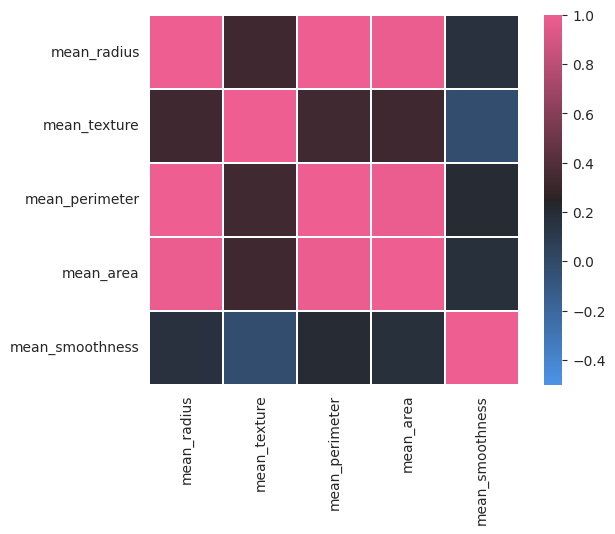

In [ ]:
#EDA
corr = data.iloc[:, :-1].corr(method='pearson')
cmap = sn.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

sn.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()


In [ ]:
#correlation pearson
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
data.head(10)


,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


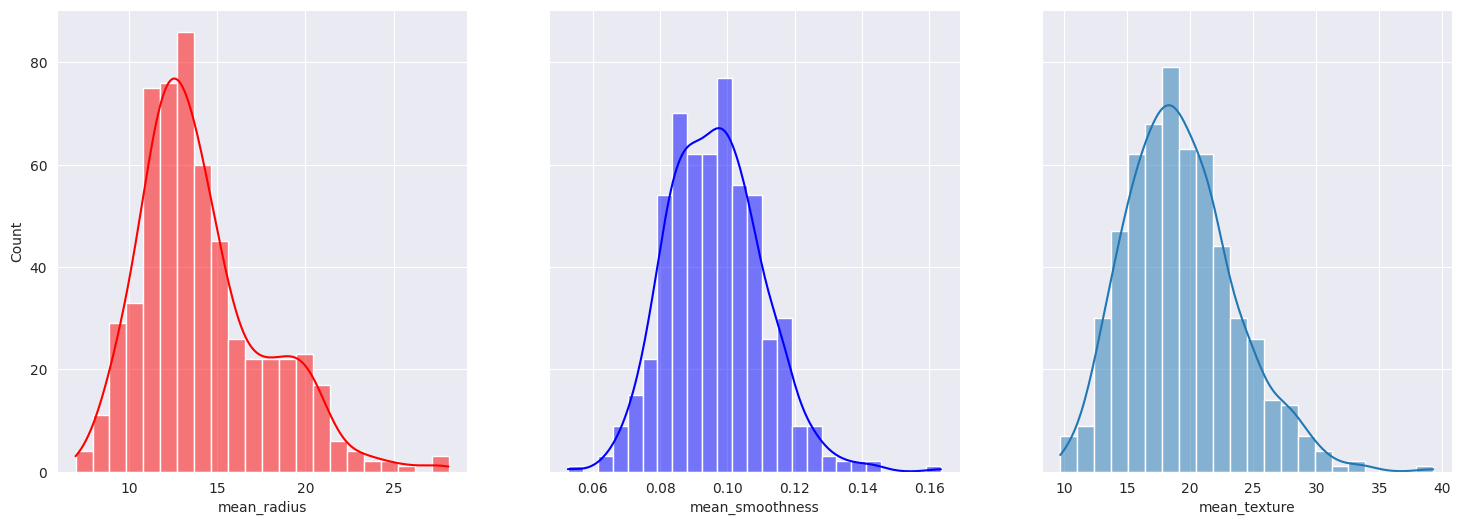

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sn.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sn.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sn.histplot(data, ax=axes[2], x="mean_texture", kde=True)
plt.show()

In [ ]:
def calculate_prior(df, Y):
    # Get the unique classes in the specified column Y
    classes = sorted(list(df[Y].unique()))

    # Initialize an empty list to store the prior probabilities
    prior = []

    # Iterate over each class
    for i in classes:
        # Calculate the prior probability for the class and append it to the list
        prior.append(len(df[df[Y] == i]) / len(df))

    return prior


In [ ]:
import numpy as np

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)

    # Filter the dataframe to include only rows where the class label Y matches the specified label
    df = df[df[Y] == label]

    # Calculate the mean and standard deviation of the feature values for the specified class
    mean, std = df[feat_name].mean(), df[feat_name].std()

    # Calculate the probability density function (PDF) of the feature value given the class using Gaussian distribution
    P_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean) ** 2 / (2 * std ** 2)))

    return P_x_given_y


In [ ]:
import numpy as np

def naive_bayes_gaussian(df, X, Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df, Y)

    # Initialize list to store predicted class labels
    Y_pred = []

    # Loop over every data sample
    for x in X:
        # Initialize likelihood list
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)

        # Calculate likelihood for each class
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calculate posterior probability (numerator only)
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Append the predicted class label based on maximum posterior probability
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Splitting the data into training and testing sets
train, test = train_test_split(data, test_size=.2, random_state=41)

# Extracting features and target labels for the test set
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Predicting with the trained Gaussian Naive Bayes model
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calculating confusion matrix and F1 score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


Linear regression using food franchise dataset

In [ ]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

Saving Food Franchise dataset.xlsx to Food Franchise dataset.xlsx


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Food Franchise dataset.xlsx')
df.head(5)

,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
1,City2,CO,715522,22000.0,78621.0,4823
2,City3,WA,739952,28500.0,89728.0,1831
3,City4,OR,652503,NaN,NaN,4182
4,City5,IL,2740598,32000.0,70318.0,5242


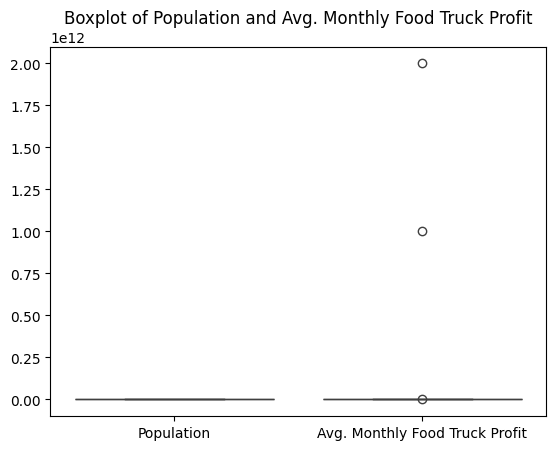

Potential Outliers:
      City State  Population  Avg. Monthly Food Truck Profit  Median Income  \
1    City2    CO      715522                    2.200000e+04        78621.0   
2    City3    WA      739952                    2.850000e+04        89728.0   
4    City5    IL     2740598                    3.200000e+04        70318.0   
9   City10    CA     1386670                    2.900000e+04        87128.0   
11  City12    CA     1045592                    3.150000e+04       102414.0   
20  City21    MA      667137                    3.300000e+04        89371.0   
22  City23    MD      602478                    2.200000e+04        71205.0   
24  City25    CT     1210858                    4.000000e+09        71262.0   
25  City26    MN     2238015                    2.000000e+12        64262.0   
42  City43    OK     2689437                    1.000000e+12        76366.0   

    Population Density (per sq mi)  
1                             4823  
2                             1831  

<ipython-input-5-45d6af96cfa3>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-5-45d6af96cfa3>:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-5-45d6af96cfa3>:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [ ]:
# 1. Handling Missing Values
df.dropna(inplace=True)  # Remove rows with missing values

# 2. Data Types
# No conversion needed as per the provided dataset

# 3. Scaling or Normalization
# Not necessary for linear regression

# 4. Handling Outliers
# Visualize potential outliers using box plots
sns.boxplot(data=df[['Population', 'Avg. Monthly Food Truck Profit']])
plt.title('Boxplot of Population and Avg. Monthly Food Truck Profit')
plt.show()

# Calculate IQR (Interquartile Range) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df[outliers]

# Display the potential outliers
print('Potential Outliers:')
print(outliers_df)

# Remove outliers from the dataset
df_cleaned = df[~outliers]

# Check the cleaned dataset
print('Cleaned Dataset:')
print(df_cleaned)
df=df_cleaned

In [ ]:
# 5. Handling Duplicate Rows
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# 6. Addressing Inconsistent or Erroneous Values
# Check for inconsistent or erroneous values in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f'Column: {col}')
    print(f'Unique Values: {unique_values}\n')

# Example of addressing inconsistencies (replace erroneous values)
# Assuming 'Avg. Monthly Food Truck Profit' should not be negative
df.loc[df['Avg. Monthly Food Truck Profit'] < 0, 'Avg. Monthly Food Truck Profit'] = 0

# Check if inconsistencies are addressed
print('Updated Dataset:')
print(df)

Column: City
Unique Values: ['City1' 'City6' 'City7' 'City8' 'City11' 'City13' 'City14' 'City15'
 'City16' 'City17' 'City18' 'City19' 'City20' 'City22' 'City24' 'City27'
 'City28' 'City29' 'City30' 'City31' 'City32' 'City33' 'City34' 'City35'
 'City36' 'City37' 'City40' 'City41' 'City42' 'City44' 'City45' 'City46'
 'City47' 'City48' 'City49' 'City50' 'City51' 'City52' 'City53' 'City54'
 'City55' 'City56' 'City57' 'City58' 'City59' 'City60' 'City61' 'City62'
 'City63' 'City64' 'City65' 'City66' 'City67' 'City68' 'City69' 'City70']

Column: State
Unique Values: ['TX' 'GA' 'AZ' 'FL' 'IN' 'OH' 'NC' 'MI' 'TN' 'OK' 'PA' 'NY' 'CA' 'WI'
 'OR' 'MD' 'WA' 'AL']

Column: Population
Unique Values: [2043891  498067 1660272 2325500 1345878  903889  881008  878333  874579
  918915  672120  678815  633045  670461  681061 3009279 2478548 3099886
 2744183 2800756 4471291 4914006 2615083 1688863 1713773 4221777 1587624
 3027484 4697485  679829 1254687 3641566 2689437]

Column: Avg. Monthly Food Truck Prof

In [ ]:
# 7. Summary Statistics
summary_stats = df.describe()
print(summary_stats)

         Population  Avg. Monthly Food Truck Profit  Median Income  \
count  5.600000e+01                       56.000000      56.000000   
mean   2.378951e+06                    24931.964286   68995.000000   
std    1.391367e+06                     4587.968578    4932.445519   
min    4.980670e+05                    15349.000000   55142.000000   
25%    1.170744e+06                    21000.000000   65331.000000   
50%    2.402024e+06                    24648.500000   69242.000000   
75%    3.045584e+06                    27625.000000   72104.000000   
max    4.914006e+06                    34583.000000   77834.000000   

       Population Density (per sq mi)  
count                       56.000000  
mean                      2322.892857  
std                        730.441104  
min                       1113.000000  
25%                       1671.750000  
50%                       2420.000000  
75%                       2830.500000  
max                       4396.000000  


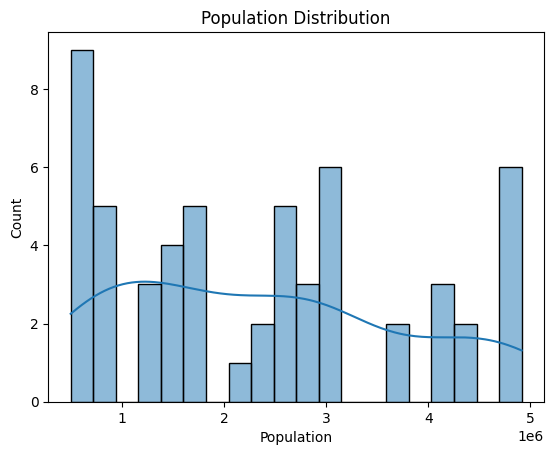

In [ ]:
# 8. Data Distribution and Skewness
# Visualize the distribution of features using histograms or KDE plots
sns.histplot(df['Population'], bins=20, kde=True)
plt.title('Population Distribution')
plt.show()

In [ ]:
# 9. Linear Regression Model
# Split the data into features (X) and target variable (y)
X = df[['Population']]
y = df['Avg. Monthly Food Truck Profit']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16464684.108040607
R-squared: -0.16178834855219582


In [ ]:
# Predict profit for a city with a population of 35,000
population_35000 = [[35000]]
predicted_profit = model.predict(population_35000)
print(f'Predicted profit for a city with a population of 35,000: ${predicted_profit[0]}')

Predicted profit for a city with a population of 35,000: $26412.745648112494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


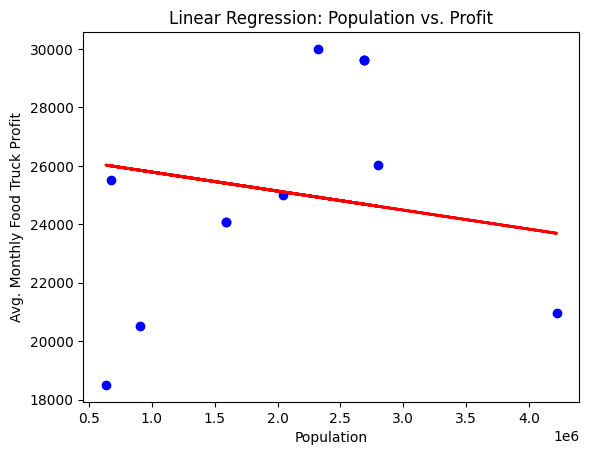

In [ ]:
# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression: Population vs. Profit')
plt.show()

Linear Regression house price prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_excel('House Price Prediction dataset.xlsx')
df.head(5)

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000


In [ ]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data cleaning and preprocessing
# For simplicity, assume that missing values can be filled with the mean value
df.fillna(df.mean(), inplace=True)

# Check data types and convert if necessary
print("Data Types:\n", df.dtypes)

Missing Values:
 Size (sq ft)    0
Bedrooms        1
Price (USD)     0
dtype: int64
Data Types:
 Size (sq ft)      int64
Bedrooms        float64
Price (USD)       int64
dtype: object


In [ ]:
df.head(5)

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000


In [ ]:
# Scaling or normalization if required (example using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Size (sq ft)', 'Bedrooms']])
df[['Size (sq ft)', 'Bedrooms']] = scaled_features

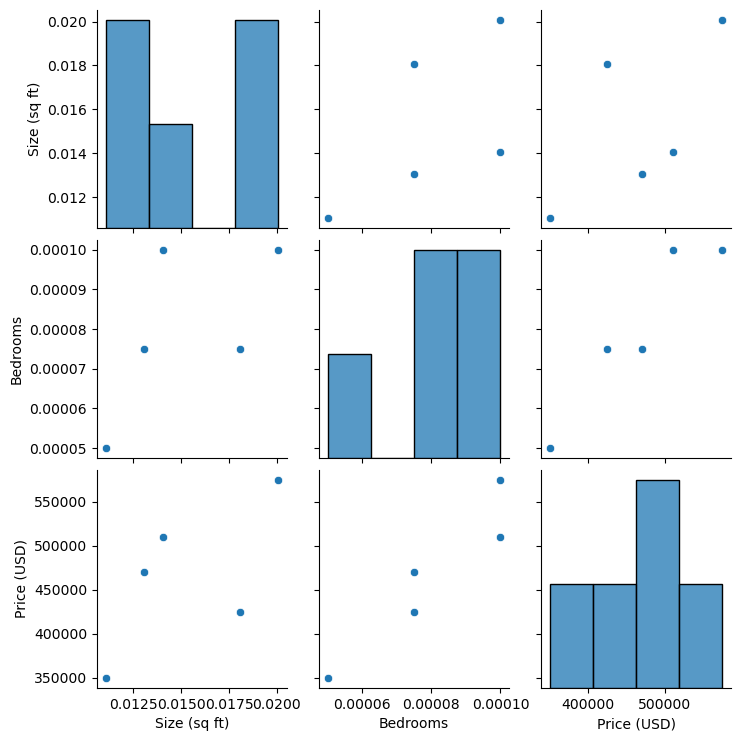

In [ ]:
# Exploratory Data Analysis
# Display pairplot to visualize relationships between variables
sns.pairplot(df.head())
plt.show()

In [ ]:
# Check for outliers and treat them (example using winsorization)
from scipy.stats import mstats
df['Price (USD)'] = mstats.winsorize(df['Price (USD)'], limits=[0.05, 0.05])

# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Size (sq ft)   Bedrooms    Price (USD)
count     48.000000  48.000000      48.000000
mean       0.034157   0.022856  417187.500000
std        0.142525   0.144282  174578.234154
min        0.000000   0.000000  120000.000000
25%        0.008785   0.000050  287500.000000
50%        0.014056   0.000075  422500.000000
75%        0.019076   0.000100  550000.000000
max        1.000000   1.000000  725000.000000


In [ ]:
# Correlation analysis
correlation = df.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
               Size (sq ft)  Bedrooms  Price (USD)
Size (sq ft)      1.000000 -0.016949    -0.055665
Bedrooms         -0.016949  1.000000     0.136558
Price (USD)      -0.055665  0.136558     1.000000


In [ ]:
# Linear Regression Model
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35068764314.95828
R-squared: -0.08474633656959019


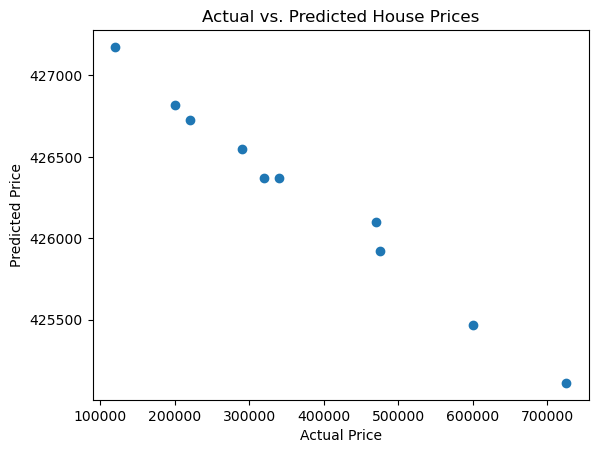

In [ ]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

LOGISTIC REGRESSION

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('applicant_score.xlsx')

In [68]:
data.columns

Index(['Applicant ID', 'GRE Score(800)', 'TOEFL Score(120)',
       'Admitted (Yes/No)'],
      dtype='object')

In [69]:
# EDA
print(data.head())  # Display the first few rows

   Applicant ID  GRE Score(800)  TOEFL Score(120) Admitted (Yes/No)
0             1             700               100               Yes
1             2             650                95               Yes
2             3             580                88                No
3             4             720               105               Yes
4             5             600               140                No


In [70]:
print(data.info())  # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Applicant ID       50 non-null     int64 
 1   GRE Score(800)     50 non-null     int64 
 2   TOEFL Score(120)   50 non-null     int64 
 3   Admitted (Yes/No)  50 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


In [71]:
print(data.describe())  # Summary statistics

       Applicant ID  GRE Score(800)  TOEFL Score(120)
count      50.00000       50.000000         50.000000
mean       25.50000      628.400000        113.520000
std        14.57738       88.395216         95.236813
min         1.00000      470.000000         73.000000
25%        13.25000      562.500000         85.250000
50%        25.50000      630.000000         95.000000
75%        37.75000      700.000000        105.750000
max        50.00000      850.000000        700.000000


In [73]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
# Option 1: Drop rows with missing values
data.dropna(inplace=True)

# Option 2: Fill missing values with a specific value (e.g., mean, median, mode)
# Replace missing values in a specific column (e.g., 'column_name') with the mean of that column
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# Option 3: Use forward fill (ffill) or backward fill (bfill) to fill missing values
# data.fillna(method='ffill', inplace=True)  # Forward fill
# data.fillna(method='bfill', inplace=True)  # Backward fill

# After handling missing values, check again for any remaining missing values
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after)

Missing Values:
Applicant ID         0
GRE Score(800)       0
TOEFL Score(120)     0
Admitted (Yes/No)    0
dtype: int64
Missing Values After Handling:
Applicant ID         0
GRE Score(800)       0
TOEFL Score(120)     0
Admitted (Yes/No)    0
dtype: int64


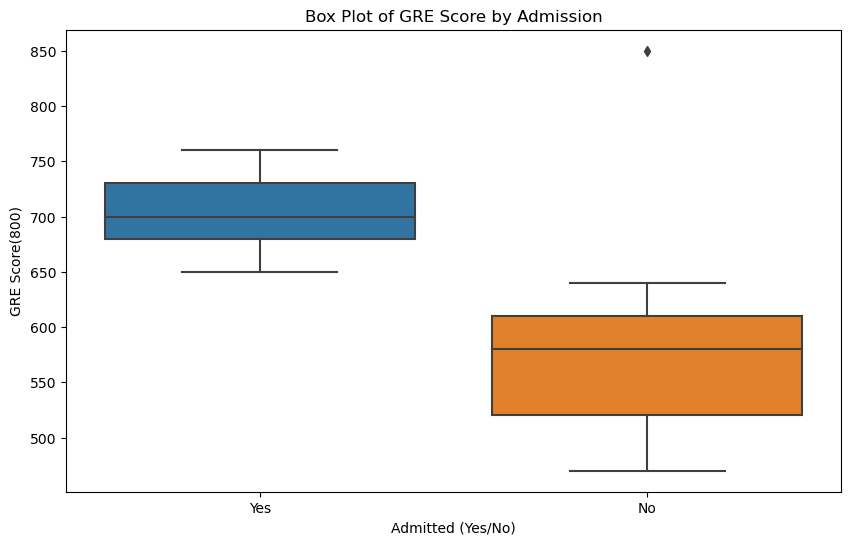

In [75]:
# Check for outliers in exam scores using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admitted (Yes/No)', y='GRE Score(800)', data=data)
plt.title('Box Plot of GRE Score by Admission')
plt.show()

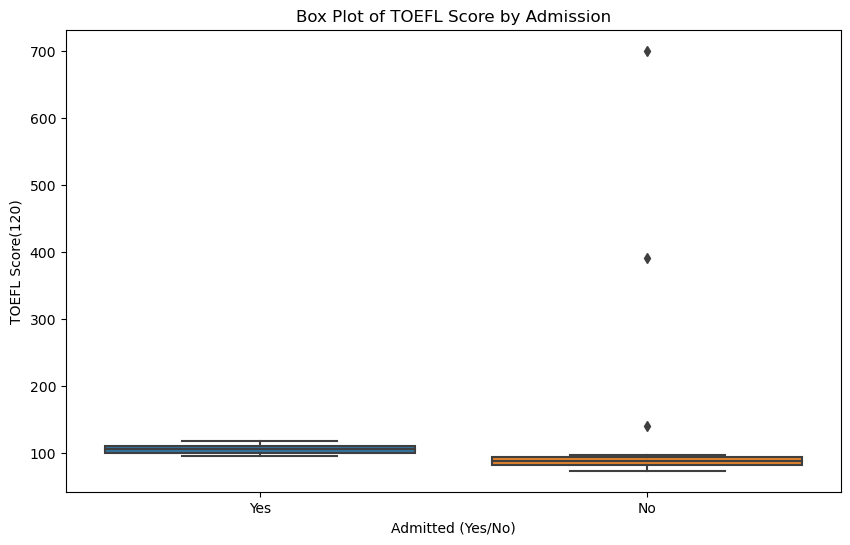

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admitted (Yes/No)', y='TOEFL Score(120)', data=data)
plt.title('Box Plot of TOEFL Score by Admission')
plt.show()

In [77]:
from scipy.stats.mstats import winsorize
# Check the distribution of 'GRE Score(800)' and 'TOEFL Score(120)' before winsorization
print("Before Winsorization:")
print(data[['GRE Score(800)', 'TOEFL Score(120)']].describe())

# Apply winsorization to limit extreme values
data['GRE Score(800)'] = winsorize(data['GRE Score(800)'], limits=[0.05, 0.05])
data['TOEFL Score(120)'] = winsorize(data['TOEFL Score(120)'], limits=[0.05, 0.05])

# Check the distribution after winsorization
print("\nAfter Winsorization:")
print(data[['GRE Score(800)', 'TOEFL Score(120)']].describe())

Before Winsorization:
       GRE Score(800)  TOEFL Score(120)
count       50.000000         50.000000
mean       628.400000        113.520000
std         88.395216         95.236813
min        470.000000         73.000000
25%        562.500000         85.250000
50%        630.000000         95.000000
75%        700.000000        105.750000
max        850.000000        700.000000

After Winsorization:
       GRE Score(800)  TOEFL Score(120)
count       50.000000         50.000000
mean       626.800000         97.420000
std         82.941829         15.709207
min        490.000000         77.000000
25%        562.500000         85.250000
50%        630.000000         95.000000
75%        700.000000        105.750000
max        750.000000        140.000000


In [79]:
# Check for duplicates
duplicate_rows = data.duplicated()
print("Duplicate Rows:")
print(duplicate_rows.sum())

# Remove duplicates if present
data.drop_duplicates(inplace=True)

Duplicate Rows:
0


In [82]:
# Standardize or normalize exam scores if necessary
# For logistic regression, standardization/normalization may not be necessary
from sklearn.preprocessing import StandardScaler

# Assuming 'GRE Score(800)' and 'TOEFL Score(120)' are the features to be standardized
scaler = StandardScaler()
data[['GRE Score(800)', 'TOEFL Score(120)']] = scaler.fit_transform(data[['GRE Score(800)', 'TOEFL Score(120)']])

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'GRE Score(800)' and 'TOEFL Score(120)' are the features to be normalized
scaler = MinMaxScaler()
data[['GRE Score(800)', 'TOEFL Score(120)']] = scaler.fit_transform(data[['GRE Score(800)', 'TOEFL Score(120)']])

In [86]:
# Split the data into training and testing sets
X = data[['GRE Score(800)', 'TOEFL Score(120)']]
y = data['Admitted (Yes/No)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [87]:
print("Accuracy:", accuracy)

Accuracy: 0.9


In [88]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6 0]
 [1 3]]


In [89]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          No       0.86      1.00      0.92         6
         Yes       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



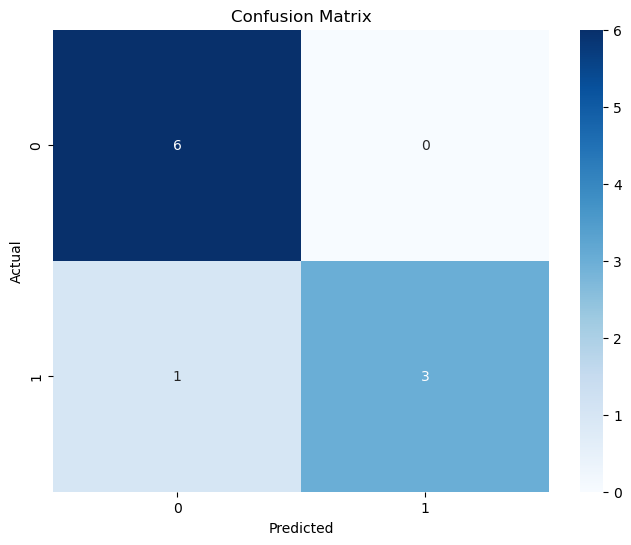

In [90]:

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform cross-validation if needed for model generalization ability

# Handle class imbalance if present using techniques like oversampling, undersampling, or using class weights

# Metrics used to assess model accuracy: accuracy score, precision, recall, F1-score, ROC-AUC if applicable
